In [3]:
# author: stefan.kowarik@uni-graz.at
# The following example loads the KMC dataset, potentially augments it with noise and rotations / shifts and plots the data

import numpy as np
import pickle
from matplotlib import pyplot as plt

# image dimensions
L = 200 # pixels

# load data from drive x_train: images, y_train: labels EB and ED
with open("./valid_dat.txt","rb") as f:
      x_train, y_train = pickle.load(f)
        
#similarly valid_dat.txt can be loaded and processed
     
# Data preprocessing:
# Adding Salt and Pepper noise:
#probability of noise level for salt and pepper pixel replacement; 0 = no noise; 1 = only noise;
prob = 0.04

#gb: should be one-channel image with pixels in [0, 1] range
def add_salt_and_pepper(gb, prob):
    rnd = np.random.rand(gb.shape[0], gb.shape[1])
    noisy = gb.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return noisy


config_x_train = []
config_y_train = []

# Adding image rotations and shifts for data augmentation
for i, y in enumerate(y_train):
        for j in range(1):  #range(4) for four 90 degree rotations for data augmentation
            lattice_rot = np.rot90(x_train[i],j)
            for k in range(1):   ##e.g. range(10) for ten image shifts for data augmentation - as simulations have periodic boundary conditions shifting / rolling images up down or left-right is possible
                config_rot_shift = add_salt_and_pepper(np.roll(lattice_rot,k*27),prob)
                config_x_train.append(config_rot_shift)
                config_x_train.append(np.fliplr(config_rot_shift))
                config_x_train.append(np.flipud(config_rot_shift))
                config_y_train.extend([y,y,y])
                

# training data
y_train = np.asarray(config_y_train, dtype=np.float16)
x_train = np.asarray(config_x_train)
x_train = x_train.reshape(x_train.shape[0], L, L, 1)

# printing dimesions: 11022 images with 200x200 pixels on one grayscale channel
print(x_train.shape)

                

(5733, 200, 200, 1)


energy values in eV for image number 1 :
[E_Diffusion, E_Binding]
[0.5127 0.3313]


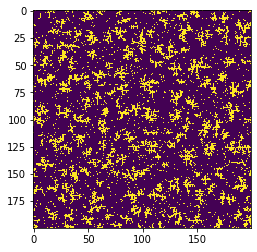

In [2]:
###Plotting example image 1
number = 1

print("energy values in eV for image number",number,":")
print("[E_Diffusion, E_Binding]")
print(y_train[number])
plt.imshow(np.array((x_train[number]))[:,:,0])


energy values in eV for image number 200 :
[E_Diffusion, E_Binding]
[0.425 0.175]


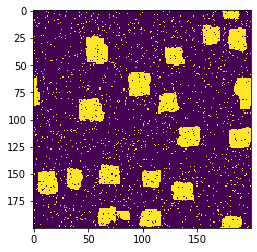

In [25]:
###Plotting example image 200
number = 200

print("energy values in eV for image number",number,":")
print("[E_Diffusion, E_Binding]")
print(y_train[number])
plt.imshow(np.array((x_train[number]))[:,:,0])